# WeatherPy

Analysis:

1. Temperatures get warmer towards the southern hemisphere. Temperatures are colder towards the northern hemisphere.

2. Humidity is lower in cool temperatures per the the plot graphs.

3. The average speed for all cities is fairly low per the wind speed graph.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
# from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

601

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# OpenWeatherMap API Key
from api_keys import api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

# url = "http://api.openweathermap.org/data/2.5/weather?q=units=Imperial&APPID=" + api_key

In [4]:
# Create empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
record = 1

#Loop through the cities in the city list 
for city in cities:  
    
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # Increase counter by one 
        record= record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue

Processing Record 1 | Berlevag
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0056ee26d9c201728aa747dd73df28cc&q=berlevag
Processing Record 2 | Vaini
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0056ee26d9c201728aa747dd73df28cc&q=vaini
Processing Record 3 | Kokuy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0056ee26d9c201728aa747dd73df28cc&q=kokuy
Processing Record 4 | Ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0056ee26d9c201728aa747dd73df28cc&q=ushuaia
Processing Record 5 | Albany
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0056ee26d9c201728aa747dd73df28cc&q=albany
Processing Record 6 | Cape Town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0056ee26d9c201728aa747dd73df28cc&q=cape town
Processing Record 7 | Hilo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0056ee26d9c201728aa747dd73df28cc&q=hilo
City not found. Skippin

Processing Record 57 | Hobart
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0056ee26d9c201728aa747dd73df28cc&q=hobart
Processing Record 58 | Kapaa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0056ee26d9c201728aa747dd73df28cc&q=kapaa
Processing Record 59 | Khani
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0056ee26d9c201728aa747dd73df28cc&q=khani
Processing Record 60 | Mogadishu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0056ee26d9c201728aa747dd73df28cc&q=mogadishu
Processing Record 61 | Clyde River
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0056ee26d9c201728aa747dd73df28cc&q=clyde river
Processing Record 62 | Karasburg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0056ee26d9c201728aa747dd73df28cc&q=karasburg
Processing Record 63 | Busselton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0056ee26d9c201728aa747dd73df28cc&q=bussel

Processing Record 113 | Maceio
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0056ee26d9c201728aa747dd73df28cc&q=maceio
City not found. Skipping...
Processing Record 114 | Monteprandone
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0056ee26d9c201728aa747dd73df28cc&q=monteprandone
Processing Record 115 | Murray Bridge
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0056ee26d9c201728aa747dd73df28cc&q=murray bridge
Processing Record 116 | Atuona
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0056ee26d9c201728aa747dd73df28cc&q=atuona
Processing Record 117 | Pacific Grove
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0056ee26d9c201728aa747dd73df28cc&q=pacific grove
City not found. Skipping...
Processing Record 118 | Castro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0056ee26d9c201728aa747dd73df28cc&q=castro
Processing Record 119 | Bambous Virieux
http://api.openw

Processing Record 168 | Mehamn
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0056ee26d9c201728aa747dd73df28cc&q=mehamn
Processing Record 169 | Springbok
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0056ee26d9c201728aa747dd73df28cc&q=springbok
Processing Record 170 | Zhigansk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0056ee26d9c201728aa747dd73df28cc&q=zhigansk
Processing Record 171 | Narsaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0056ee26d9c201728aa747dd73df28cc&q=narsaq
Processing Record 172 | Adre
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0056ee26d9c201728aa747dd73df28cc&q=adre
Processing Record 173 | Taywarah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0056ee26d9c201728aa747dd73df28cc&q=taywarah
Processing Record 174 | Santiago
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0056ee26d9c201728aa747dd73df28cc&q=santiago

Processing Record 223 | Esperance
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0056ee26d9c201728aa747dd73df28cc&q=esperance
Processing Record 224 | Ketchikan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0056ee26d9c201728aa747dd73df28cc&q=ketchikan
City not found. Skipping...
Processing Record 225 | Matay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0056ee26d9c201728aa747dd73df28cc&q=matay
Processing Record 226 | Janakpur
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0056ee26d9c201728aa747dd73df28cc&q=janakpur
Processing Record 227 | Kununurra
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0056ee26d9c201728aa747dd73df28cc&q=kununurra
Processing Record 228 | Nizhnevartovsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0056ee26d9c201728aa747dd73df28cc&q=nizhnevartovsk
City not found. Skipping...
Processing Record 229 | Opuwo
http://api.openweathermap.org/da

Processing Record 277 | Dicabisagan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0056ee26d9c201728aa747dd73df28cc&q=dicabisagan
Processing Record 278 | Fairbanks
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0056ee26d9c201728aa747dd73df28cc&q=fairbanks
Processing Record 279 | Paso de Carrasco
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0056ee26d9c201728aa747dd73df28cc&q=paso de carrasco
Processing Record 280 | Vestmanna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0056ee26d9c201728aa747dd73df28cc&q=vestmanna
Processing Record 281 | Saint-Ambroise
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0056ee26d9c201728aa747dd73df28cc&q=saint-ambroise
Processing Record 282 | San Patricio
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0056ee26d9c201728aa747dd73df28cc&q=san patricio
Processing Record 283 | Vranov
http://api.openweathermap.org/data/2.5/weather?units=

Processing Record 332 | Varkaus
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0056ee26d9c201728aa747dd73df28cc&q=varkaus
Processing Record 333 | Mufulira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0056ee26d9c201728aa747dd73df28cc&q=mufulira
Processing Record 334 | Praia da Vitoria
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0056ee26d9c201728aa747dd73df28cc&q=praia da vitoria
Processing Record 335 | Vila
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0056ee26d9c201728aa747dd73df28cc&q=vila
Processing Record 336 | Shiraz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0056ee26d9c201728aa747dd73df28cc&q=shiraz
Processing Record 337 | Svetlogorsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0056ee26d9c201728aa747dd73df28cc&q=svetlogorsk
Processing Record 338 | Imamoglu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0056ee26d9c201728aa74

Processing Record 388 | Stabat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0056ee26d9c201728aa747dd73df28cc&q=stabat
Processing Record 389 | Port Macquarie
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0056ee26d9c201728aa747dd73df28cc&q=port macquarie
Processing Record 390 | Itoman
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0056ee26d9c201728aa747dd73df28cc&q=itoman
Processing Record 391 | Axim
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0056ee26d9c201728aa747dd73df28cc&q=axim
Processing Record 392 | Poum
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0056ee26d9c201728aa747dd73df28cc&q=poum
Processing Record 393 | Baherden
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0056ee26d9c201728aa747dd73df28cc&q=baherden
Processing Record 394 | Villa Union
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0056ee26d9c201728aa747dd73df28cc&q=vil

Processing Record 443 | Kawalu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0056ee26d9c201728aa747dd73df28cc&q=kawalu
Processing Record 444 | Senekal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0056ee26d9c201728aa747dd73df28cc&q=senekal
Processing Record 445 | Inhambane
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0056ee26d9c201728aa747dd73df28cc&q=inhambane
Processing Record 446 | La Union
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0056ee26d9c201728aa747dd73df28cc&q=la union
City not found. Skipping...
Processing Record 447 | Puri
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0056ee26d9c201728aa747dd73df28cc&q=puri
City not found. Skipping...
Processing Record 448 | Wanning
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0056ee26d9c201728aa747dd73df28cc&q=wanning
Processing Record 449 | La Orilla
http://api.openweathermap.org/data/2.5/weather?units=I

Processing Record 498 | Zhangye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0056ee26d9c201728aa747dd73df28cc&q=zhangye
Processing Record 499 | Mount Gambier
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0056ee26d9c201728aa747dd73df28cc&q=mount gambier
Processing Record 500 | Port Augusta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0056ee26d9c201728aa747dd73df28cc&q=port augusta
City not found. Skipping...
Processing Record 501 | Sao Joao da Barra
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0056ee26d9c201728aa747dd73df28cc&q=sao joao da barra
Processing Record 502 | Yongzhou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0056ee26d9c201728aa747dd73df28cc&q=yongzhou
Processing Record 503 | Coria
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0056ee26d9c201728aa747dd73df28cc&q=coria
Processing Record 504 | Nantucket
http://api.openweathermap.org/data/2.5/w

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [36]:
# Create a dictonary with the lists generated
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from dictionary
weather_data = pd.DataFrame(weatherpy_dict)

# Display count of weather data values 
weather_data.count()

City          534
Cloudiness    534
Country       534
Date          534
Humidity      534
Lat           534
Lng           534
Max Temp      534
Wind Speed    534
dtype: int64

In [37]:
# Save data frame to CSV
weather_data.to_csv('weather.csv')

# Display data frame head
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Berlevag,1,NO,1559781978,82,70.86,29.09,41.27,9.48
1,Vaini,75,IN,1559781979,94,15.34,74.49,75.20,17.22
2,Kokuy,92,RU,1559781980,51,52.20,117.55,56.75,4.68
3,Ushuaia,0,AR,1559781787,70,-54.81,-68.31,42.80,5.82
4,Albany,90,US,1559781834,83,42.65,-73.75,71.60,4.70


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

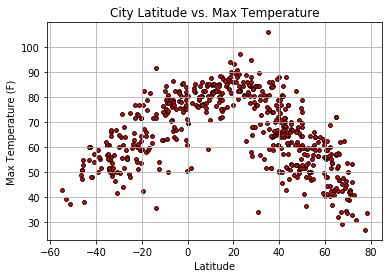

In [38]:
plt.scatter(weather_data ["Lat"], weather_data ["Max Temp"], marker="o", facecolors="red", edgecolors="black", s=14)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs. Max Temperature')
plt.grid(True)
plt.savefig("lat_vs_temp.png")
plt.show()

#### Latitude vs. Humidity Plot

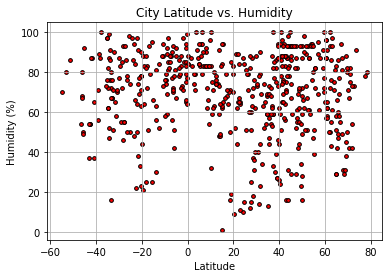

In [39]:
plt.scatter(weather_data ["Lat"], weather_data ["Humidity"], marker="o", facecolors="red", edgecolors="black", s=14)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity')
plt.grid(True)
plt.savefig("Humidity_vs_Latitude.png")
plt.show()

#### Latitude vs. Cloudiness Plot

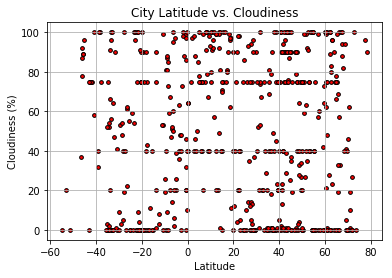

In [40]:
plt.scatter(weather_data ["Lat"], weather_data ["Cloudiness"], marker="o", facecolors="red", edgecolors="black", s=14)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness')
plt.grid(True)
plt.savefig("Cloudiness_vs_Latitude.png")
plt.show()

#### Latitude vs. Wind Speed Plot

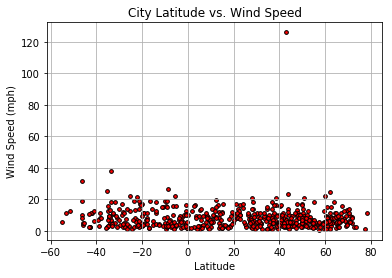

In [41]:
plt.scatter(weather_data ["Lat"], weather_data ["Wind Speed"], marker="o", facecolors="red", edgecolors="black", s=14)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs. Wind Speed')
plt.grid(True)
plt.savefig("Wind_Speed_vs_Latitude.png")
plt.show()